In [2]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


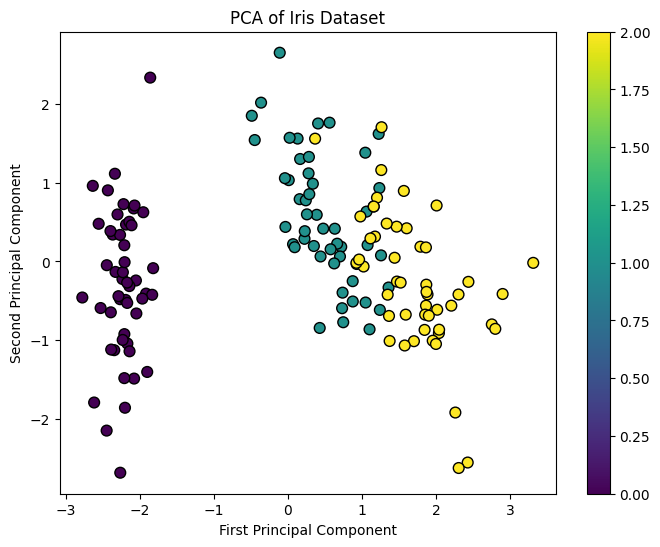

In [3]:
# Step 2: Load and Standardize Data
# For demonstration, let's use the Iris dataset, which is built into sklearn
data = load_iris()
X = data.data
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 3: Covariance Matrix
covariance_matrix = np.cov(X_scaled.T)
# Step 4: Eigenvalue and Eigenvector Calculation
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
# Step 5: Sort Eigenvalues in descending order
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_indices]
eig_vecs_sorted = eig_vecs[:, sorted_indices]
# Step 6: Project the Data onto the Principal Components
top_k = 2  # Number of principal components we want to keep
selected_eigenvectors = eig_vecs_sorted[:, :top_k]
X_pca = X_scaled.dot(selected_eigenvectors)
# Step 7: Visualization
# Plotting the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, cmap='viridis', edgecolor='k', s=60)
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

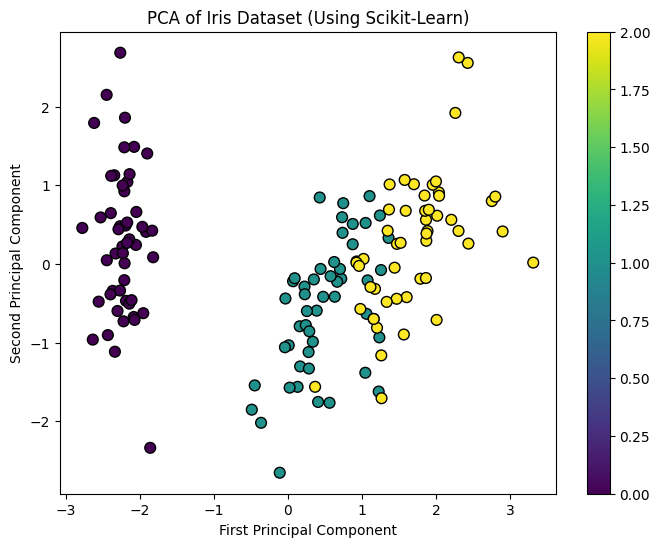

In [4]:
# Step 1: Apply PCA using sklearn
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca_sklearn = pca.fit_transform(X_scaled)
# Step 2: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=data.target, cmap='viridis', edgecolor='k', s=60)
plt.title('PCA of Iris Dataset (Using Scikit-Learn)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

In [9]:
import pandas as pd
iris_data = load_iris()
x = iris_data.data
# scaled the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scled = scaler.fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scled)

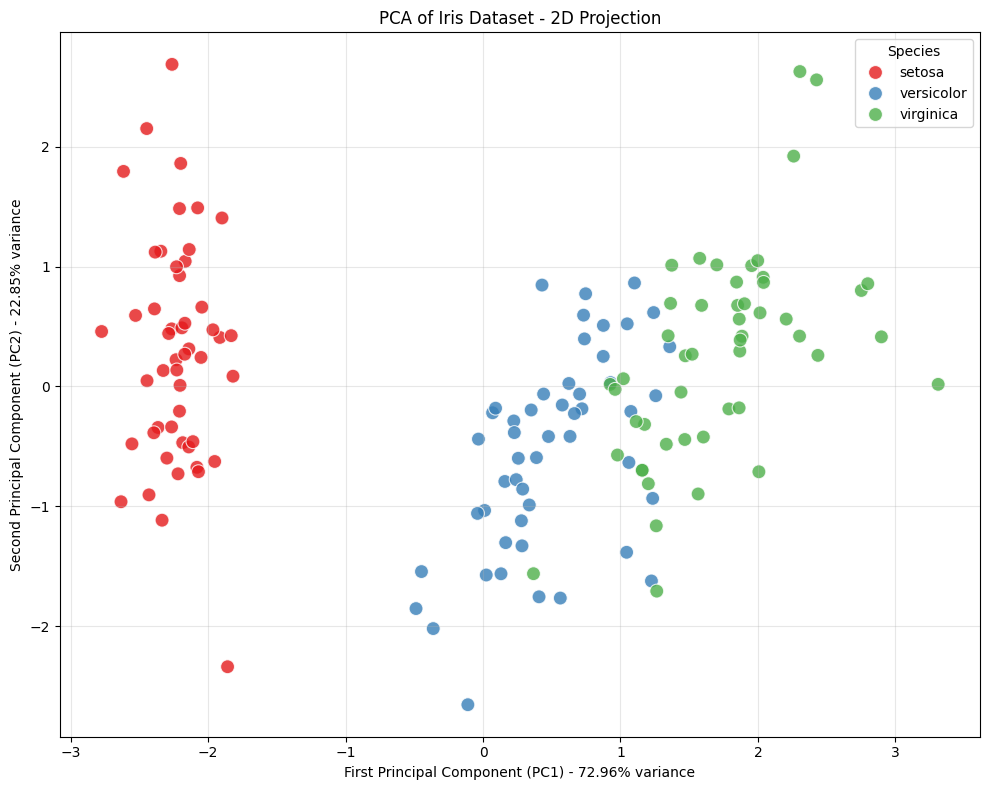

Explained variance ratio: PC1=72.96%, PC2=22.85%
Total variance explained: 95.81%


In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

iris_data = load_iris()
x = iris_data.data
y = iris_data.target
target_names = iris_data.target_names

# scaled the data
scaler = StandardScaler()
x_scled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y
pca_df['species_name'] = pca_df['species'].map({i: name for i, name in enumerate(target_names)})

# Seaborn plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species_name', 
                palette='Set1', s=100, alpha=0.8)
plt.xlabel(f'First Principal Component (PC1) - {pca.explained_variance_ratio_[0]:.2%} variance')
plt.ylabel(f'Second Principal Component (PC2) - {pca.explained_variance_ratio_[1]:.2%} variance')
plt.title('PCA of Iris Dataset - 2D Projection')
plt.legend(title='Species')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optional: Print variance information
print(f"Explained variance ratio: PC1={pca.explained_variance_ratio_[0]:.2%}, PC2={pca.explained_variance_ratio_[1]:.2%}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")